In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numba as nb
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.optimize import minimize

from toy_samples import gaussian_samples
from covariance import logX_mu, logX_covinv_chol, points_at_iteration, logPr

# Load test samples
from tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("test_samples/samples_1.pickle")

In [18]:
def logt_sample(n):
    p = np.random.rand()
    return 1/n * np.log(p)
logt_sample = np.vectorize(logt_sample)

def X_sample(nk):
    logt_samples = logt_sample(nk)
    logX = np.sum(logt_samples)
    X = np.exp(logX)
    return X

def generate_Xs(nk, iterations=None):
    logt_samples = logt_sample(nk)
    logXs = np.cumsum(logt_samples)
    Xs = np.exp(logXs)
    if iterations is not None:
        return np.take(Xs, iterations)
    return Xs

def generate_Xsamples(nk, n_samples, iterations=None):
    if iterations is None:
        n_iterations = len(nk)
    else:
        n_iterations = len(iterations)
    X_samples = np.zeros((n_samples, n_iterations))
    for i in range(n_samples):
        X_samples[i] = generate_Xs(nk, iterations)    
    return X_samples

In [73]:
nlive = 100
iterations = 200
nk = nlive * np.ones(iterations)

iteration_1 = 10
iteration_2 = 150
logX1_mean = logX_mu(nk)[iteration_1]
logX2_mean = logX_mu(nk)[iteration_2]
X1_mean = np.exp(logX1_mean)
X2_mean = np.exp(logX2_mean)

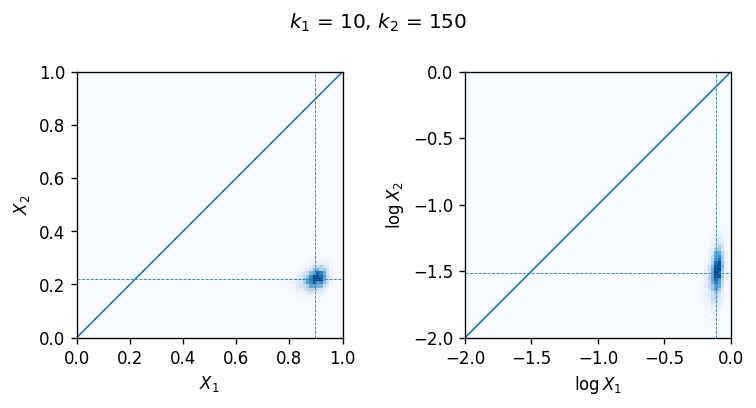

In [77]:
n_samples = 5000
X1samples, X2samples = generate_Xsamples(nk, n_samples, [iteration_1, iteration_2]).T

bins = 80
fig, axs = plt.subplots(1, 2, dpi=120)

# Plot Xs
axs[0].hist2d(X1samples, X2samples, bins=bins, cmap='Blues', range=[[0,1], [0,1]]);
# sns.kdeplot(x=X1samples, y=X2samples, levels=[0.2, 0.5, 0.68, 0.95], linewidth=0.1)
x0 = np.linspace(0, 1, 100)
axs[0].plot(x0, x0, lw=1)
axs[0].axvline(x=X1_mean, lw=0.5, ls='--')
axs[0].axhline(y=X2_mean, lw=0.5, ls='--')
axs[0].set_xlabel("$X_1$")
axs[0].set_ylabel("$X_2$");
axs[0].set_aspect('equal');

# Plot logXs
logXrange = [-2, 0]
axs[1].hist2d(np.log(X1samples), np.log(X2samples), bins=bins, cmap='Blues', range=[logXrange, logXrange]);
# sns.kdeplot(x=X1samples, y=X2samples, levels=[0.2, 0.5, 0.68, 0.95], linewidth=0.1)
x0 = np.linspace(-3, 0, 100)
axs[1].plot(x0, x0, lw=1)
axs[1].axvline(x=logX1_mean, lw=0.5, ls='--')
axs[1].axhline(y=logX2_mean, lw=0.5, ls='--')
axs[1].set_xlabel("$\log X_1$")
axs[1].set_ylabel("$\log X_2$");
axs[1].set_aspect('equal')

plt.suptitle(f"$k_1$ = {iteration_1}, $k_2$ = {iteration_2}", y=0.8)
plt.tight_layout();